In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [2]:
# Loss function: Log likelihood
def compute_loss(y, hx):
    return -np.mean(y * np.log(hx) + (1 - y) * np.log(1 - hx))

In [3]:
# Gradient of the loss
def compute_gradient(X, y, hx):
    return np.dot(X.T, (hx - y)) / y.shape[0]

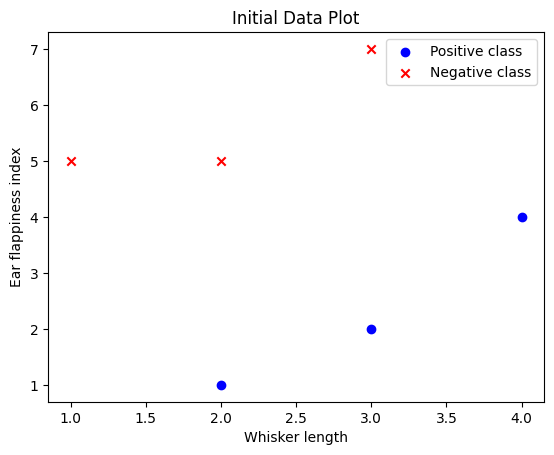

In [4]:
# Dataset
X = np.array([
    [2, 1],
    [3, 2],
    [4, 4],  # Positive examples
    [1, 5],
    [2, 5],
    [3, 7]   # Negative examples
])
y = np.array([1, 1, 1, 0, 0, 0])  # Labels

# Plot initial data
plt.scatter(X[:3, 0], X[:3, 1], color='blue', marker='o', label='Positive class')
plt.scatter(X[3:, 0], X[3:, 1], color='red', marker='x', label='Negative class')
plt.xlabel('Whisker length')
plt.ylabel('Ear flappiness index')
plt.legend()
plt.title('Initial Data Plot')
plt.show()

In [9]:
# Logistic regression model
def logistic_regression(X, y, learning_rate=0.01, num_iterations=100):
    # Add intercept term to X
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    
    # Initialize weights
    weights = np.zeros(X.shape[1])
    
    # Gradient descent
    for i in range(num_iterations):
        z = np.dot(X, weights)
        hx = sigmoid(z)
        loss = compute_loss(y, hx)
        gradient = compute_gradient(X, y, hx)
        weights -= learning_rate * gradient 
        
        # Plot only at iteration 0 and every 10 iterations
        if i == 0 or (i + 1) % 10 == 0:
            plot_decision_boundary(X, y, weights, loss, i)
            print(f'Iteration {i}: Theta={weights}, Loss={loss}')
    
    return weights

# Plotting function for decision boundary
def plot_decision_boundary(X, y, weights, loss, iteration):
    plt.scatter(X[:3, 1], X[:3, 2], color='blue', marker='o', label='Positive class' if iteration == 0 else "")
    plt.scatter(X[3:, 1], X[3:, 2], color='red', marker='x', label='Negative class' if iteration == 0 else "")
    
    # Extend the x values a bit beyond the minimum and maximum values of the dataset
    x_values = np.array([np.min(X[:, 1]) - 1, np.max(X[:, 1]) + 1])
    y_values = -(weights[0] + weights[1] * x_values) / weights[2]
    plt.plot(x_values, y_values, 'k-')
    
    plt.xlim(x_values[0], x_values[1])
    plt.ylim(np.min(X[:, 2]) - 1, np.max(X[:, 2]) + 1)
    plt.xlabel('Whisker length')
    plt.ylabel('Ear flappiness index')
    plt.title(f'Decision boundary at iteration {iteration}\nLoss: {loss}')
    if iteration == 0:
        plt.legend()
    plt.show()

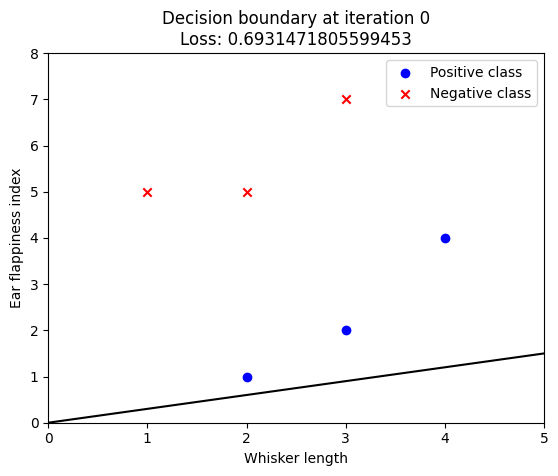

Iteration 0: Theta=[ 0.          0.0025     -0.00833333], Loss=0.6931471805599453


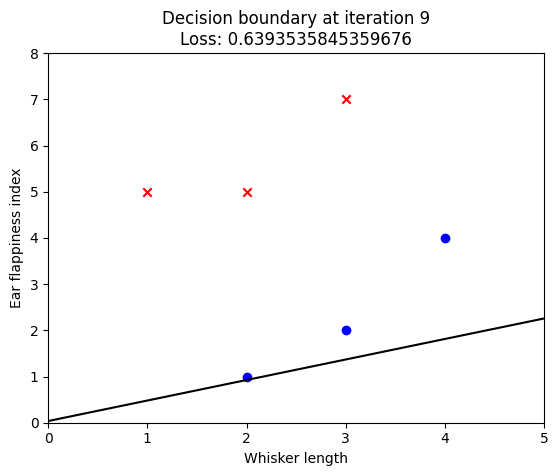

Iteration 9: Theta=[ 0.00253071  0.03103124 -0.0698611 ], Loss=0.6393535845359676


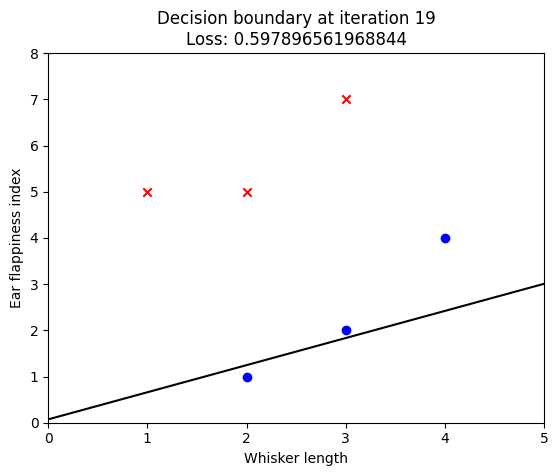

Iteration 19: Theta=[ 0.00863789  0.07021494 -0.11960431], Loss=0.597896561968844


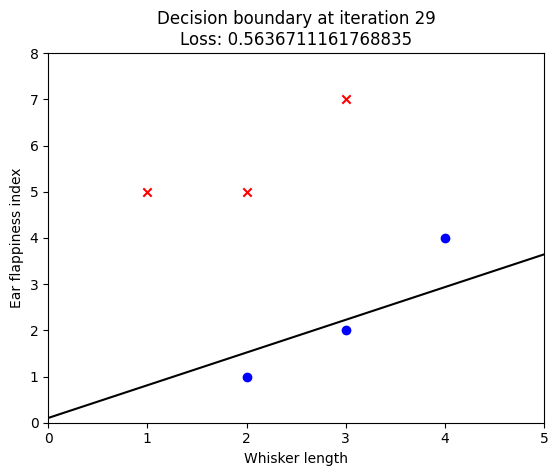

Iteration 29: Theta=[ 0.01633345  0.11247983 -0.15880419], Loss=0.5636711161768835


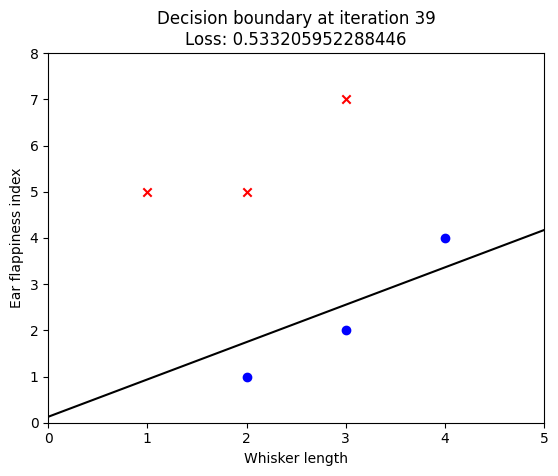

Iteration 39: Theta=[ 0.0246503   0.15538399 -0.19215587], Loss=0.533205952288446


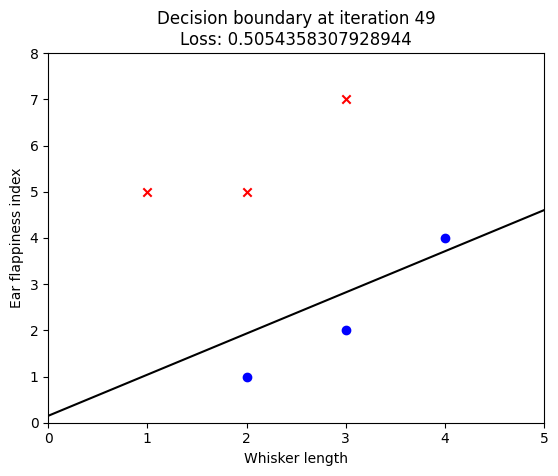

Iteration 49: Theta=[ 0.03311328  0.19774985 -0.2220176 ], Loss=0.5054358307928944


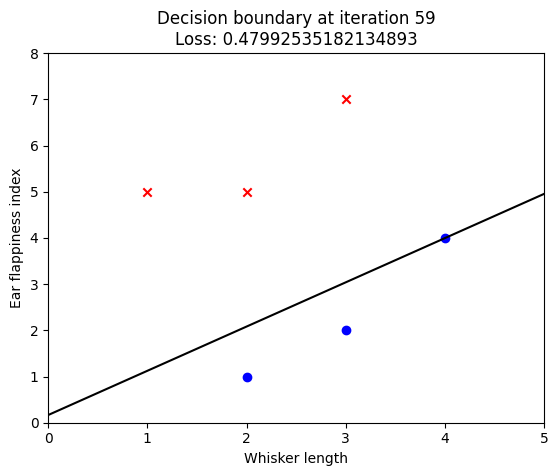

Iteration 59: Theta=[ 0.04148855  0.2390205  -0.24961113], Loss=0.47992535182134893


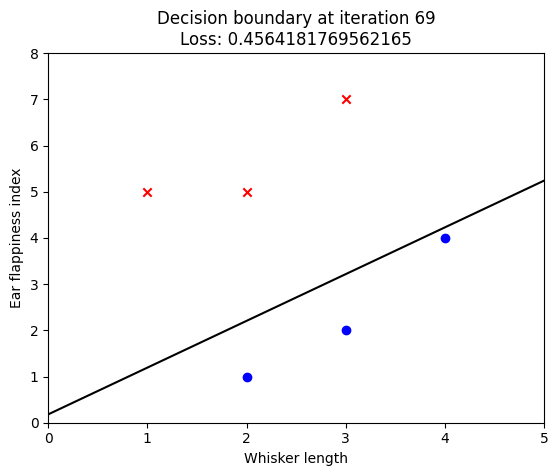

Iteration 69: Theta=[ 0.04966367  0.27895154 -0.27558943], Loss=0.4564181769562165


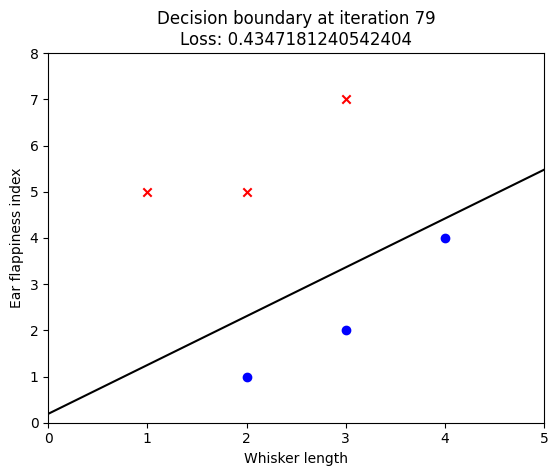

Iteration 79: Theta=[ 0.05758825  0.31745804 -0.30031434], Loss=0.4347181240542404


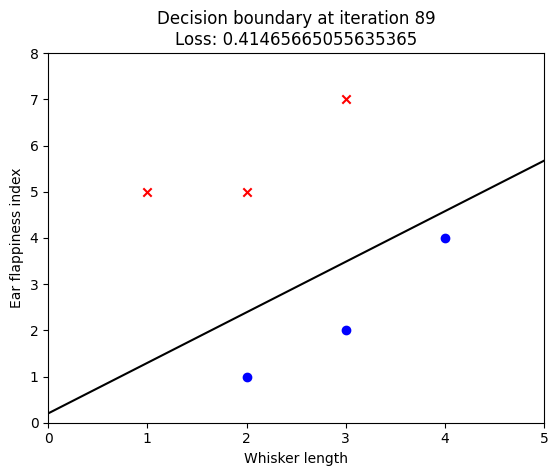

Iteration 89: Theta=[ 0.06524382  0.35453629 -0.32399611], Loss=0.41465665055635365


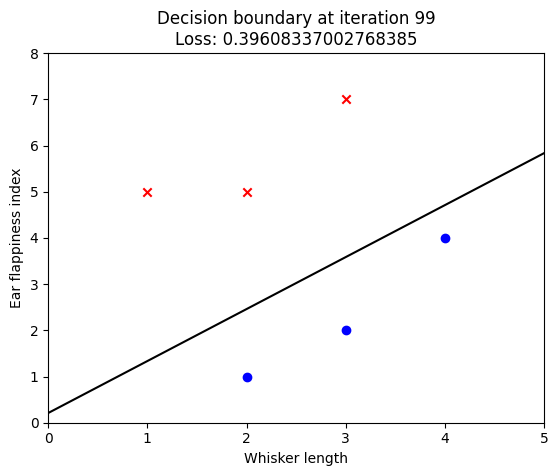

Iteration 99: Theta=[ 0.07262827  0.39022322 -0.34676487], Loss=0.39608337002768385


In [10]:
# Training the model
weights = logistic_regression(X, y)